In [1]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load Dataset
data = pd.read_csv('Outlier_removing.xls')

In [4]:
# Step 3: Identify Numerical Columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
# Remove 'label_encoded' as it's not a feature for normalization/standardization
if 'label_encoded' in numerical_cols:
    numerical_cols.remove('label_encoded')
print (numerical_cols)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [5]:
# Step 4: Min-Max Normalization
data_minmax = data.copy()
data_minmax[numerical_cols] = (data [numerical_cols] - data[numerical_cols].min()) / (data[numerical_cols].max() - data[numerical_cols].min())
data_minmax.to_csv('minmax_normalized.csv', index=False)

In [6]:
# Step 5: Load the Dataset (as CSV)
data1 = pd.read_csv('minmax_normalized.csv')

In [7]:
# Step 6: Standardization (Z-score)
data1_standardized = data1.copy()
data1_standardized[numerical_cols] = (data1[numerical_cols] - data1[numerical_cols].mean()) / data1[numerical_cols].std()
data1_standardized.to_csv('standardized.csv', index=False)

In [8]:
# Simulate original values using typical ranges
original_ranges = {
    'N': (0, 140),
    'P': (5, 145),
    'K': (5, 205),
    'temperature': (8, 43),
    'humidity': (14, 100),
    'ph': (3.5, 9.9),
    'rainfall': (20, 300)
}

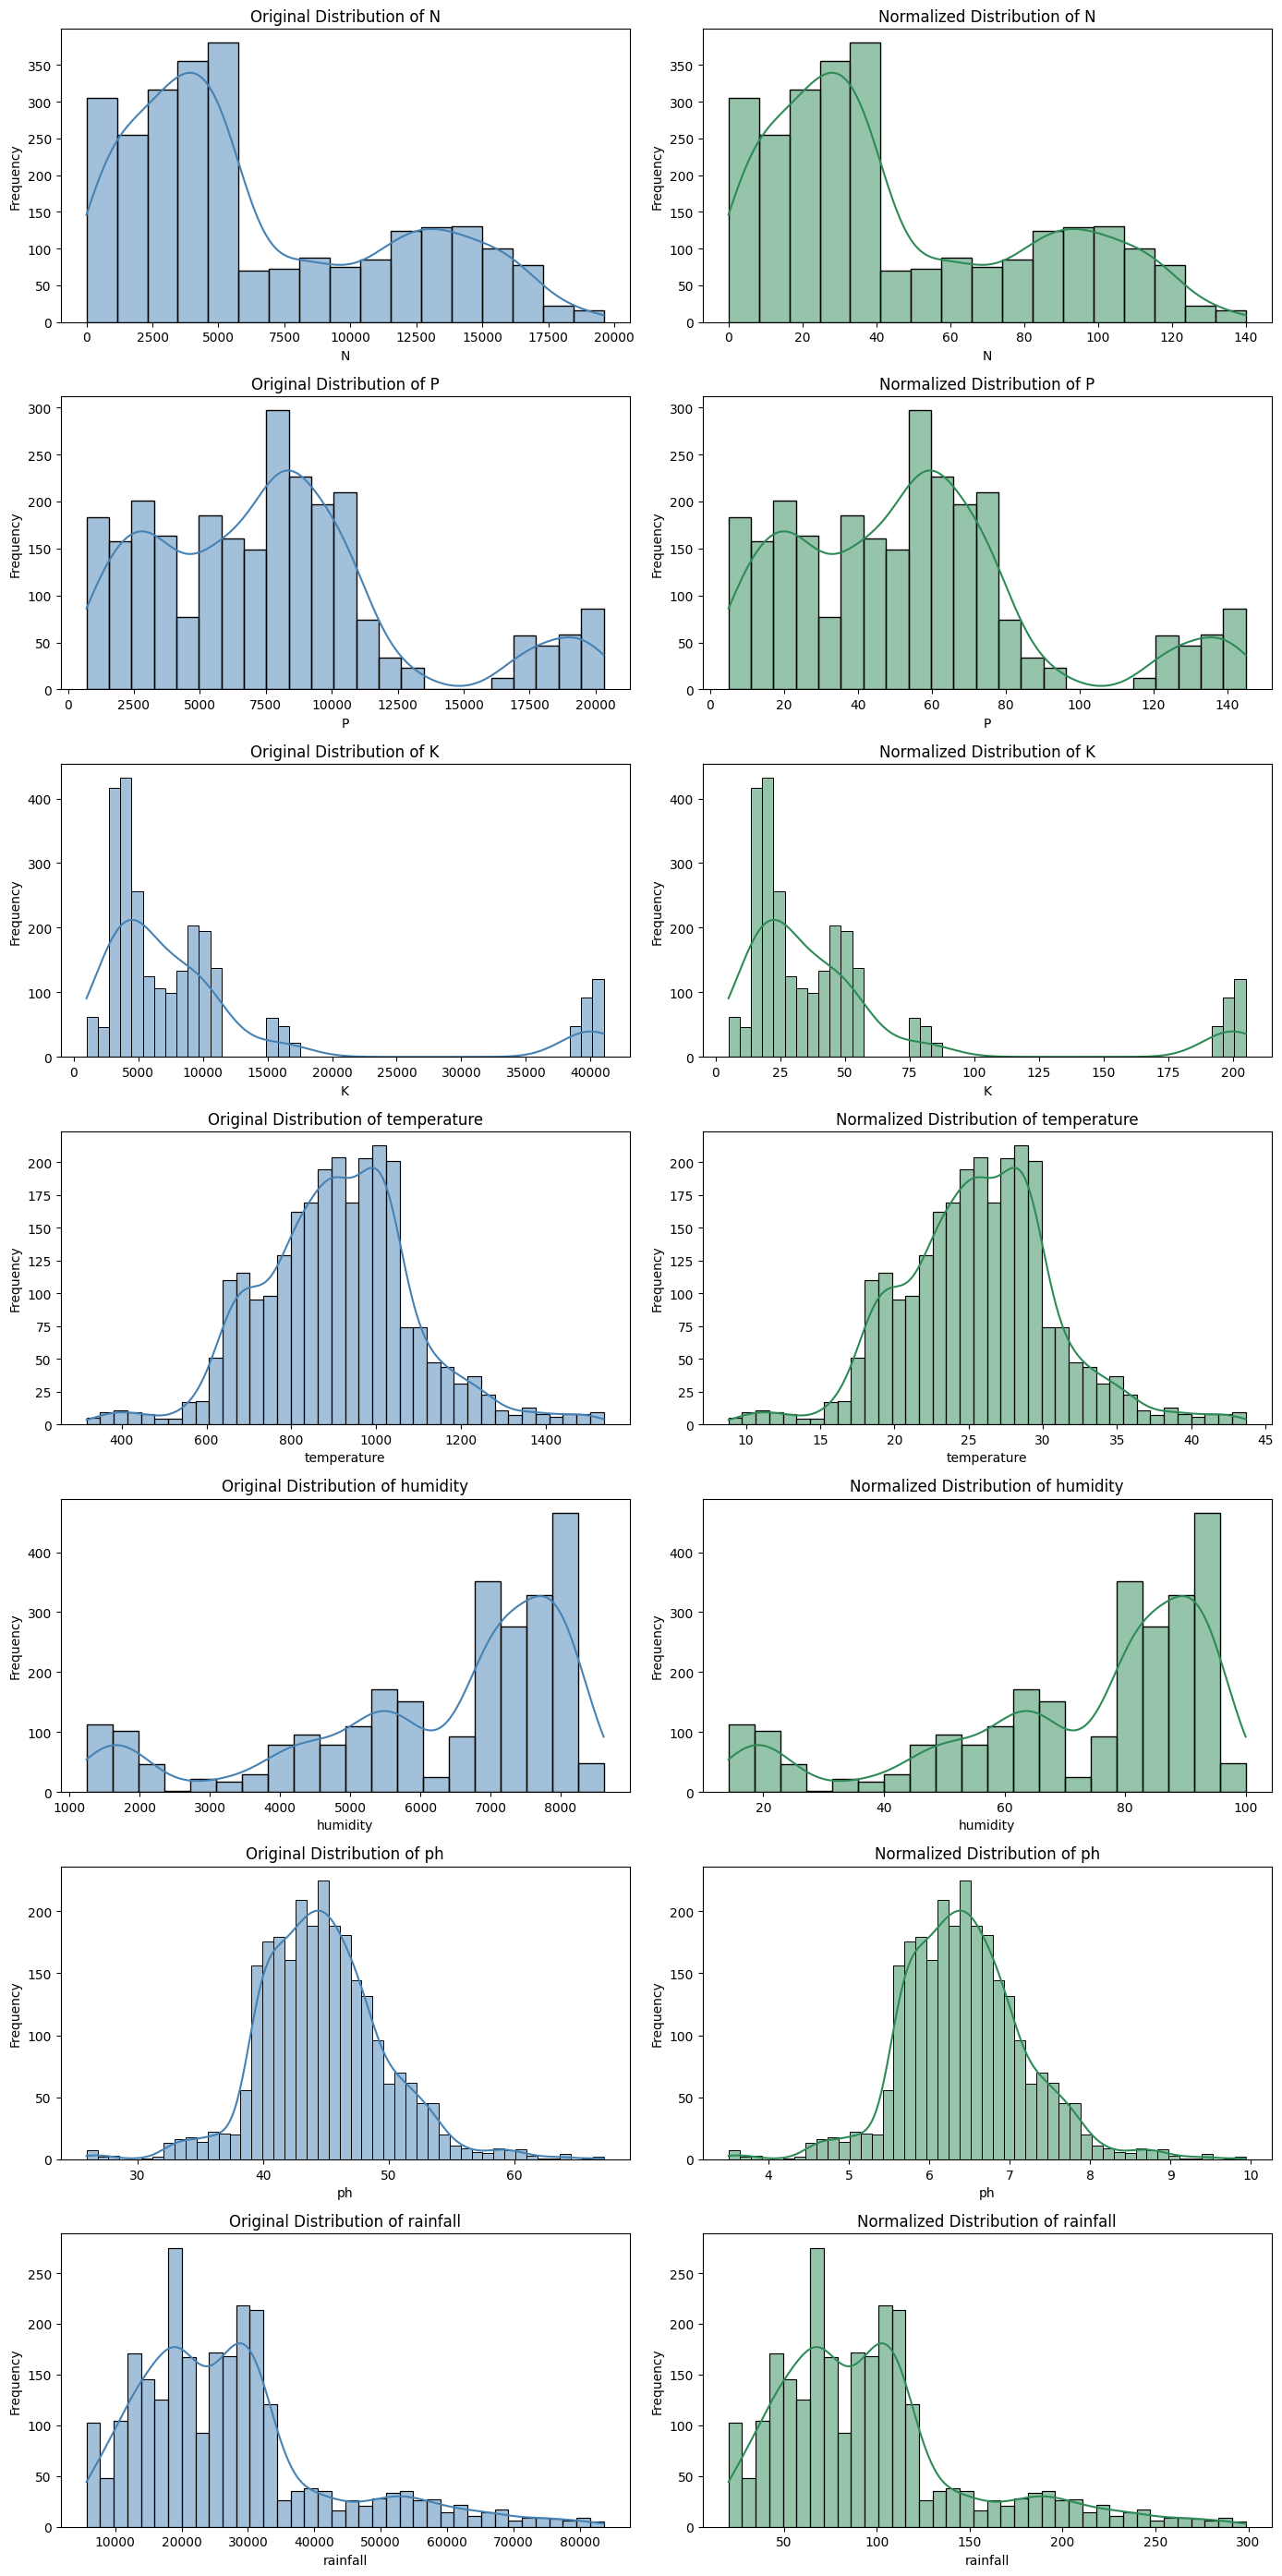

In [9]:

# Reconstruct original values
original_data = data[numerical_cols].copy()
for col in numerical_cols:
    min_val, max_val = original_ranges[col]
    original_data [col] = data [col] * (max_val - min_val) + min_val

# Plot before and after histograms
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 28))
for i, col in enumerate (numerical_cols):
    sns.histplot(original_data[col], kde=True, ax=axes[i][0], color='steelblue')
    axes[i][0].set_title(f'Original Distribution of {col}')
    axes[i][0].set_xlabel(col)
    axes[i][0].set_ylabel('Frequency')

    sns.histplot(data [col], kde=True, ax=axes[i][1], color='seagreen')
    axes[i][1].set_title(f'Normalized Distribution of {col}')
    axes[i][1].set_xlabel(col)
    axes[i][1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('before_after_histograms.png')
plt.show()

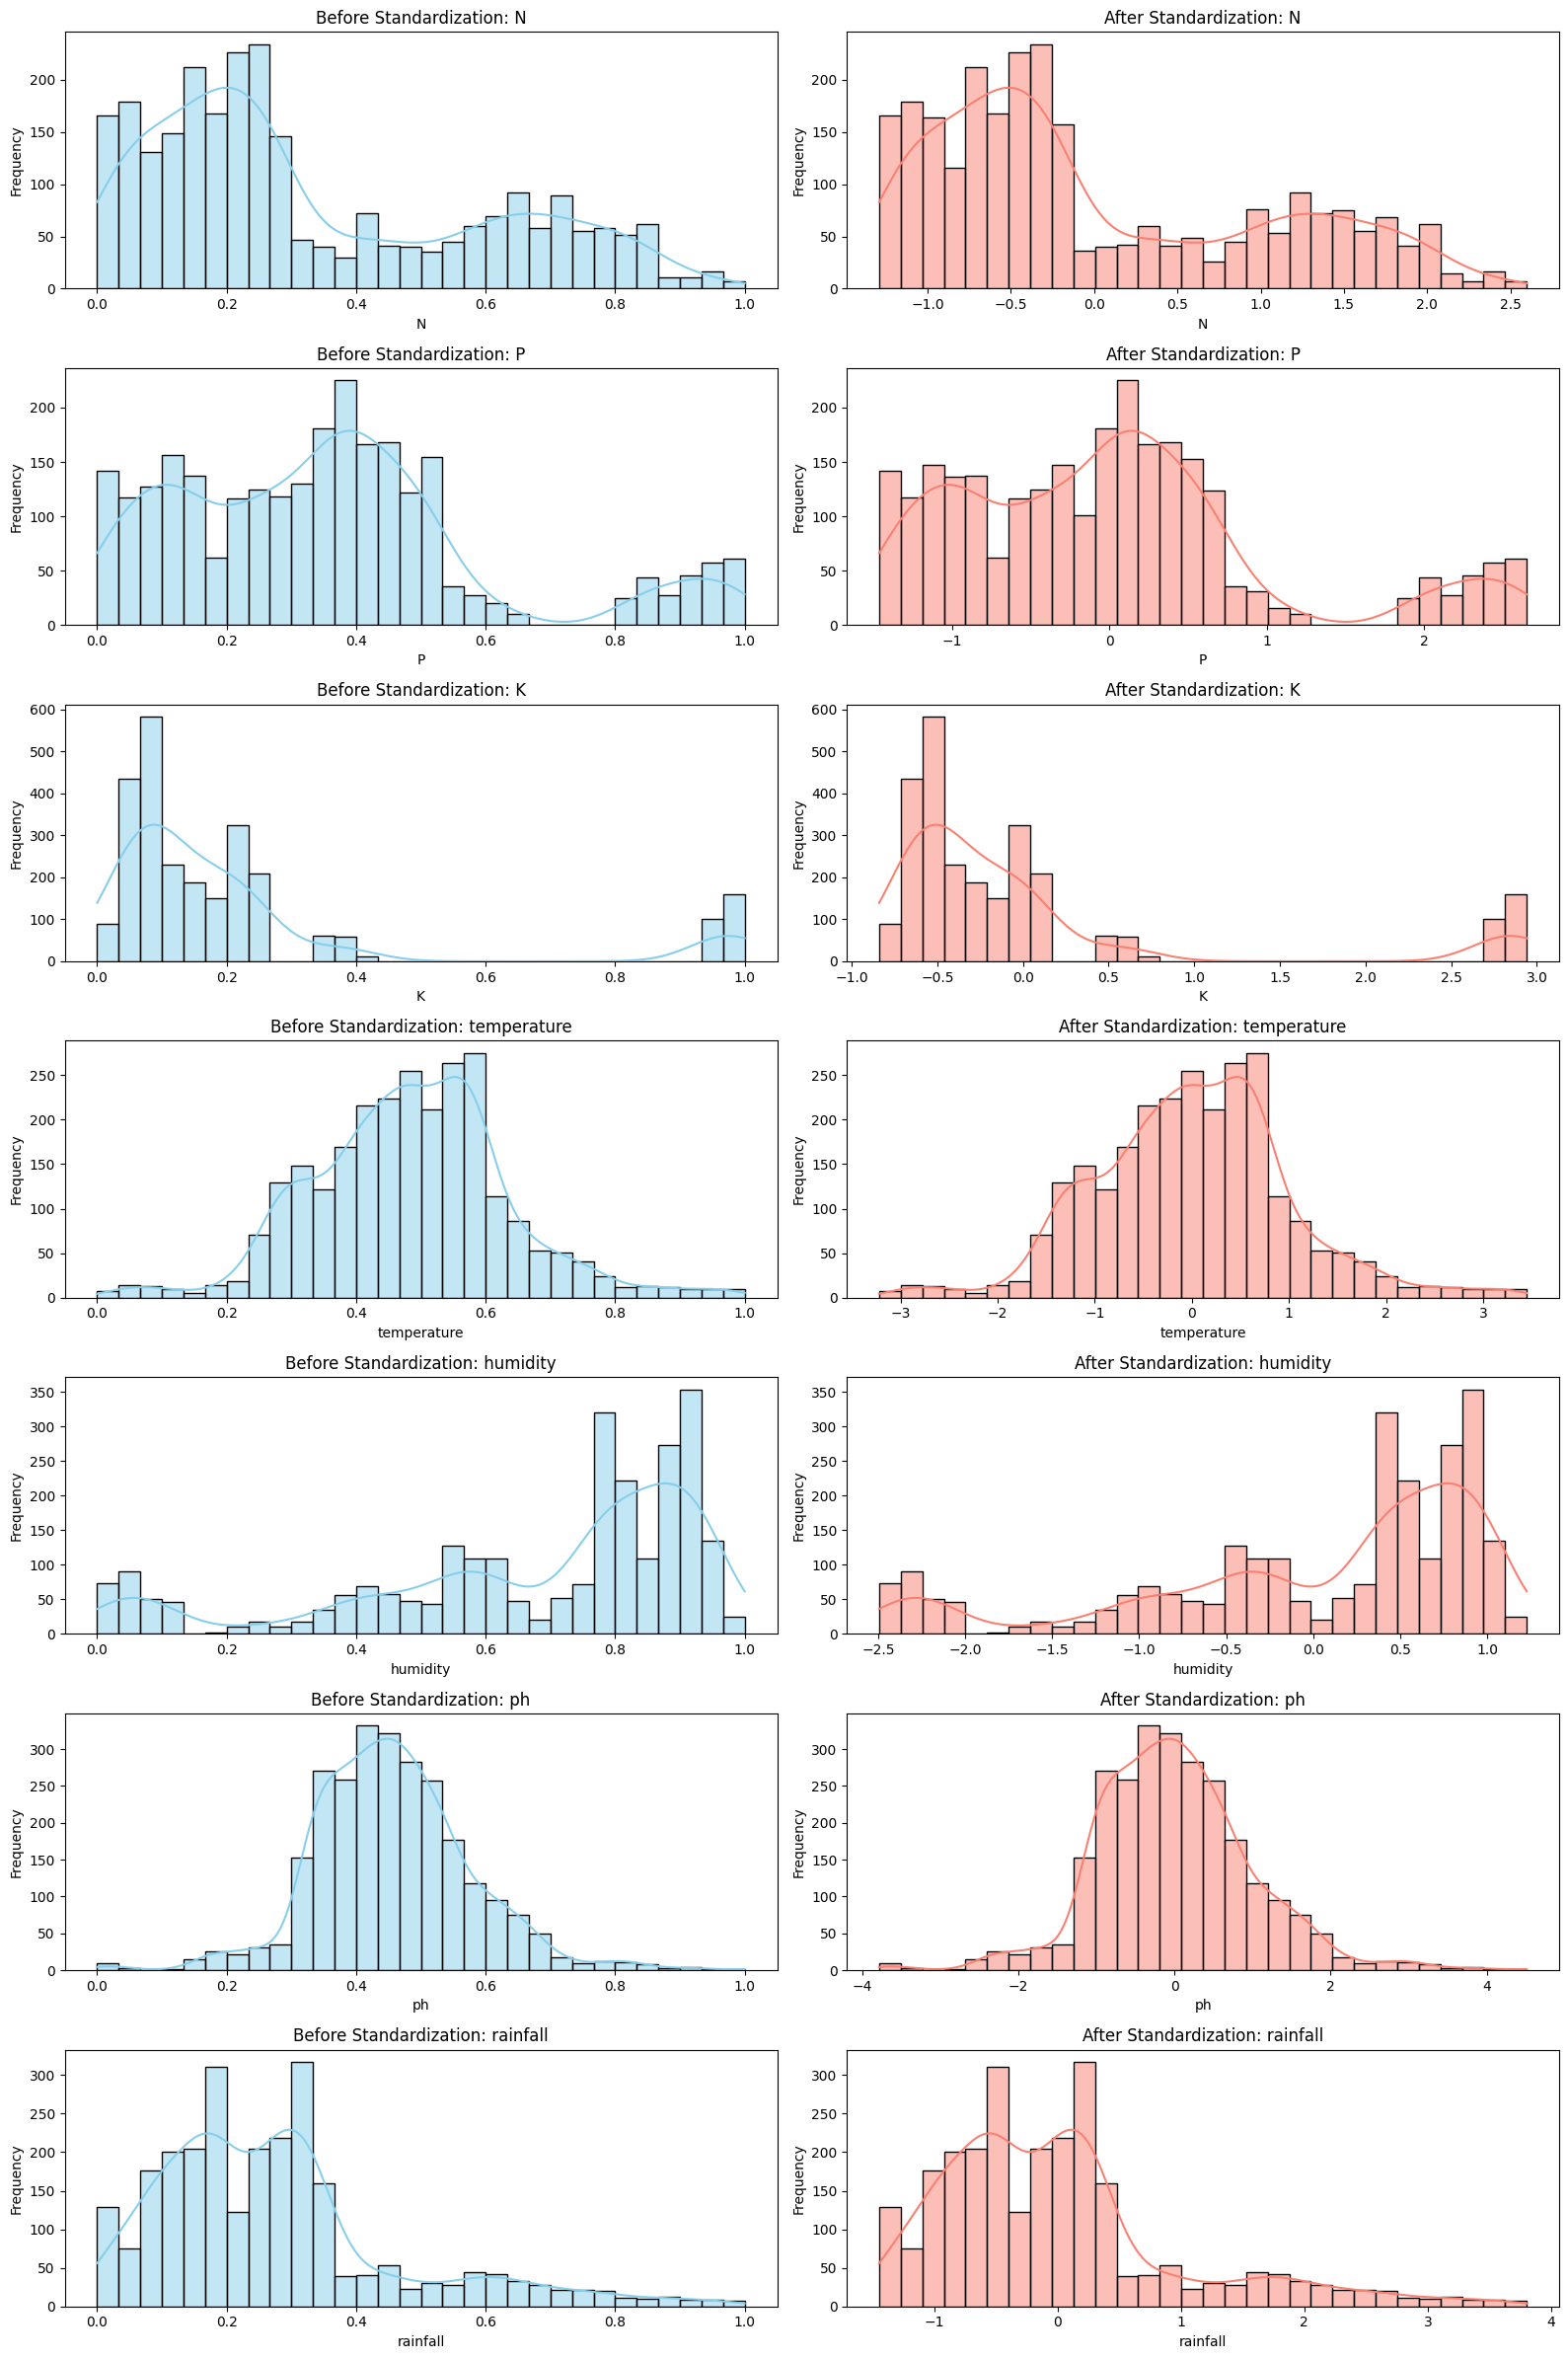

In [10]:
# Step 4: Plot Side-by-Side Histograms
plt.figure(figsize=(16, 24))
for i, col in enumerate(numerical_cols, 1):
    # Min-Max Normalized
    plt.subplot(7, 2, 2*i - 1)
    sns.histplot(data_minmax[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Before Standardization: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Standardized
    plt.subplot(7, 2, 2*i)
    sns.histplot(data1_standardized[col], kde=True, bins=30, color='salmon')
    plt.title(f'After Standardization: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('before_after_standardization_histograms.png')
plt.show()